#Neural Networks Project - 2

## Problem Statement:

**SVHN** is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

**The goal of this project is to take an image from the SVHN dataset and determine what that digit is. This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1, '9' has label 9 and '0' has label 10.**
Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of 32-by-32 RGB images centred around a single digit (many of the images do contain some distractors at the sides).

##Project Desciption: 

In this hands-on project the goal is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. **First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.**

## Project Objective

The objective of the project is to learn how to implement a simple image classification pipeline based on the k-Nearest Neighbour and a deep neural network. The goals of this assignment are as follows:


1.   Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
2.   Data fetching and understand the train/val/test splits.
3.   Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)
4.   Print the classification metric report (2.5 points)
5.   Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)
6.   Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)
7.   Implement batch normalization for training the neural network (2.5 points)
8.   Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)





## Project Background:

 Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

**More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.**

**Step 1:** The SVHN data source (SVHN_single_grey1.h5) has been shared to us and is available on Google Drive. Lets establish connection with Google Drive

In [0]:
import os
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import h5py

In [0]:
filename='/content/drive/My Drive/Greatlearning_AIML/Greatlakes/Residency_Labs_Solution/Project/Deep Learning/SVHN_single_grey1.h5'

with h5py.File(filename,'r') as f:
  X_test=f["X_test"][:]
  X_train=f["X_train"][:]
  y_test=f["y_test"][:]
  y_train=f["y_train"][:]
  X_val=f["X_val"][:]
  y_val=f["y_val"][:]

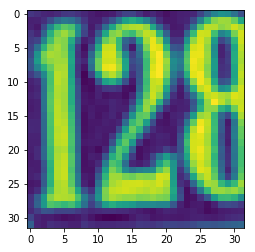

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [0]:
#Print shape of train and test datasets
print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)
# print the unique numbers in y
print(np.unique(y_train))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)
[0 1 2 3 4 5 6 7 8 9]


###Observation: Training dataset has 42000 images of pixel size 32 x 32 and the testing dataset consists of 18000 images of pixel size 32 x 32.

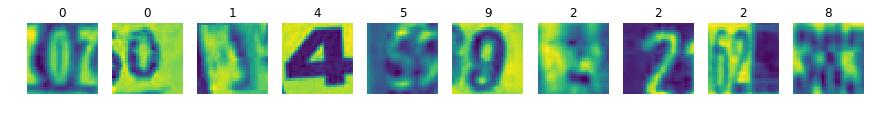

In [0]:
# Plot some train data with labels 

plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=1, ncols=10)

for i, j in enumerate(np.random.randint(0, X_train.shape[0], size=10)):
    ax[i].axis('off')
    ax[i].set_title(y_train[j], loc='center')
    ax[i].imshow(X_train[j,:,:])

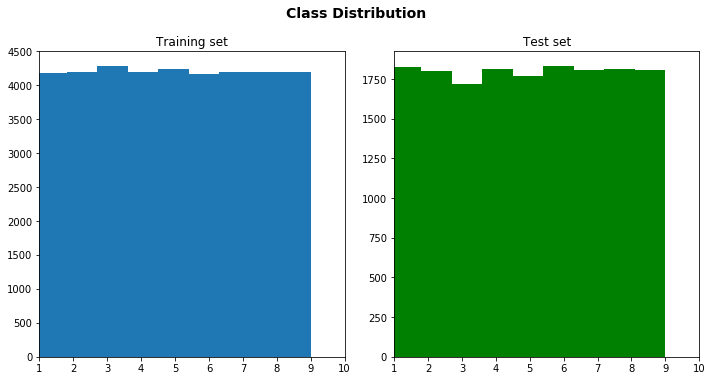

In [0]:
# plotting the distribution of the data in the train and test set


plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

###Observation: From the plotting we can observe that the dataset is evenly distributed.

## Approach 1: Using K-Nearest Neighbor (KNN) classifier

*   The current dataset shape is three dimension & shall not compile when passed to ML algorithms. 
*   KNN always expects a two dimensional data. So, we will need to reshape data.
*   We will need to flatten the three dimensional data into two dimensional data. 
*   3D -> (number_of_samples, nx, ny ): The number of samples shall be maintained whereas The nx and ny components can be multiplied and kept as the second dimension.
*   3D --> (number_of_samples, nx, ny ) need to be flattened to 2D --> (number_of_samples, nx*ny)

In [0]:
nsamples, nx, ny = X_train.shape
n1samples,n1x,n1y = X_test.shape
n2samples,n2x,n2y = X_val.shape

print(nsamples, nx, ny)
print(n1samples,n1x,n1y)
print(n2samples,n2x,n2y)

42000 32 32
18000 32 32
60000 32 32


In [0]:
X_train_new = X_train.reshape((nsamples,nx*ny))
X_test_new = X_test.reshape((n1samples,n1x*n1y))
X_val_new = X_val.reshape((n2samples,n2x*n2y))

print(X_train_new.shape)
print(X_test_new.shape)
print(X_val_new.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)
(42000,)
(18000,)


In [0]:
import sklearn
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Optimum way to calculate the K value is mentioned below:
*   Optimum K =  sqrt(N)/2 where N is the number of samples.
*   Here we have 42000 samples and hence K = sqrt(42000)/2 = 103

In [0]:
kVals = range(1, 30, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 30, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(X_train_new, y_train)
 
	# evaluate the model and update the accuracies list
	score = model.score(X_test_new, y_test)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))  


k=1, accuracy=45.92%
k=3, accuracy=46.18%
k=5, accuracy=49.02%
k=7, accuracy=50.71%
k=9, accuracy=51.24%
k=11, accuracy=51.80%
k=13, accuracy=52.11%
k=15, accuracy=52.36%
k=17, accuracy=52.87%
k=19, accuracy=52.72%
k=21, accuracy=52.91%
k=23, accuracy=52.98%
k=25, accuracy=52.97%
k=27, accuracy=53.23%
k=29, accuracy=53.16%
k=27 achieved highest accuracy of 53.23% on validation data


In [0]:
# re-train our classifier using the best k=27 and predict the labels of the
# test data
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train_new,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [0]:
predictions = model.predict(X_test_new)
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       0.46      0.71      0.56      1814
           1       0.46      0.73      0.56      1828
           2       0.64      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.64      0.65      0.65      1812
           5       0.53      0.40      0.45      1768
           6       0.51      0.41      0.46      1832
           7       0.71      0.62      0.66      1808
           8       0.47      0.37      0.41      1812
           9       0.55      0.44      0.49      1804

    accuracy                           0.53     18000
   macro avg       0.54      0.53      0.53     18000
weighted avg       0.54      0.53      0.53     18000



In [0]:
#Confusion matrix

print(confusion_matrix(y_test,predictions))

[[1289   60   31   44   51   29   94   39   70  107]
 [  96 1337   54   82   80   34   33   51   32   29]
 [  90  249  971   92   48   45   30  146   45   87]
 [ 121  267  118  742   57  165   38   53   93   65]
 [ 102  253   32   53 1183   21   51   23   39   55]
 [ 144  164   49  244   78  707  141   35  121   85]
 [ 310  127   31   62  143  127  755   23  208   46]
 [ 101  197  115   79   43   29   39 1130   26   49]
 [ 255  134   60  107  101   94  246   28  666  121]
 [ 321  146   61   82   65   92   54   74  108  801]]


## Approach 2 - Using Deep Neural Network (DNN) Classifier

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
tf.set_random_seed(42)


In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [0]:
val_Y = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

#Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Train the model
model.fit(X_train,trainY,          
          validation_data=(X_test,testY),
          epochs=20,
          batch_size=30)

W0728 10:50:30.211068 140564211632000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 200us/sample - loss: 2.1431 - acc: 0.2028 - val_loss: 1.6508 - val_acc: 0.4427
Epoch 2/20
42000/42000 [==============================] - 7s 169us/sample - loss: 1.7036 - acc: 0.4013 - val_loss: 1.2259 - val_acc: 0.6252
Epoch 3/20
42000/42000 [==============================] - 7s 169us/sample - loss: 1.4735 - acc: 0.4990 - val_loss: 1.0660 - val_acc: 0.6782
Epoch 4/20
42000/42000 [==============================] - 7s 168us/sample - loss: 1.3306 - acc: 0.5611 - val_loss: 0.9636 - val_acc: 0.7174
Epoch 5/20
42000/42000 [==============================] - 7s 168us/sample - loss: 1.2152 - acc: 0.6079 - val_loss: 0.8682 - val_acc: 0.7444
Epoch 6/20
42000/42000 [==============================] - 7s 168us/sample - loss: 1.1213 - acc: 0.6440 - val_loss: 0.8190 - val_acc: 0.7582
Epoch 7/20
42000/42000 [==============================] - 7s 169us/sample - loss: 1.0450 - acc: 0.6743 - val_l

In [0]:
model.save('svhn_dnn_v1.h5')

In [0]:
prediction = model.predict(X_test)

In [0]:
count = 0
yP = prediction
while count<3000:
    yP[count][0] = np.argmax(prediction[count])
    count = count+1

In [0]:
print(model.evaluate(X_test,testY))

18000/18000 [==============================] - 1s 64us/sample - loss: 0.5506 - acc: 0.8371
[0.5506375112003751, 0.83705556]


In [0]:

cm=confusion_matrix(testY.argmax(axis=1), yP.argmax(axis=1))
print(cm)

[[1383   35   14    6   23    3  187   21   13  129]
 [ 316 1342   13   10   39    8   11   50   19   20]
 [ 305   33 1296   18   21   11    6   68   10   35]
 [ 287   39   22 1090   21  124   12   39   46   39]
 [ 311   45   24    8 1303   12   26   14   25   44]
 [ 332   19    8   46   17 1212   62   13   29   30]
 [ 333   20    7   14   44   47 1287   10   51   19]
 [ 313   79   35   12   11    6    6 1324    9   13]
 [ 337   36   22   32   25   37  110   18 1134   61]
 [ 350   31   21   35   18   28    8   34   27 1252]]


In [0]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(testY.argmax(axis=1), yP.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.32      0.76      0.45      1814
     class 1       0.80      0.73      0.77      1828
     class 2       0.89      0.72      0.79      1803
     class 3       0.86      0.63      0.73      1719
     class 4       0.86      0.72      0.78      1812
     class 5       0.81      0.69      0.74      1768
     class 6       0.75      0.70      0.73      1832
     class 7       0.83      0.73      0.78      1808
     class 8       0.83      0.63      0.71      1812
     class 9       0.76      0.69      0.73      1804

    accuracy                           0.70     18000
   macro avg       0.77      0.70      0.72     18000
weighted avg       0.77      0.70      0.72     18000



## Conclusion & Closing Remarks

**1.   Traditional ML - KNN algorithm:**
*    The prediction took a lot of time to predict the test values which were fed into the model
*    The accuracy score was hovering around 53% which was very low compared with the neural network model.


**2.    Neural network model - (using batch normalization, RELU as activation, ADAM as optimizer)**
*    The model took very less time to train the dataset and the prediction, evaluation was even faster as compared to KNN.
*    Inspite of being faster, there was no issues with accuracy and other metric parameters.
*    The accuracy in the train data set was 78%, and the test set gave an accuracy of 83.71% which is exceedingly high compared with the traditional ML models.
